In [3]:
from tqdm import tqdm
import numpy as np
from scipy.stats import binom, beta
from scipy.special import gamma
np.set_printoptions(suppress=True)
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
np.set_printoptions(suppress=True)

In [4]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

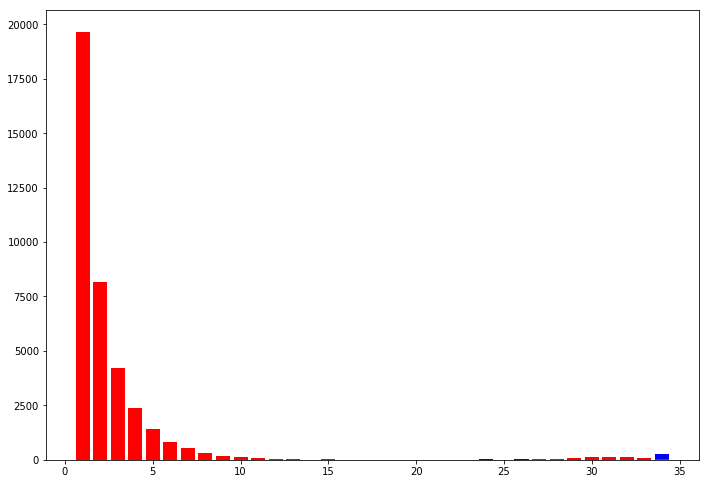

299310 690


In [80]:
# Parameters
N = 300000
a = .1
b = 30
p1 = .9
S = 34
mix = 0.0023

a2 = 4
b2 = .4

N1 = beta.rvs(a, b, size = int(N * (1- mix)))
N2 = beta.rvs(a2, b2, size = int(N * (mix)))
prop = np.concatenate((N1, N2), axis = 0)

obs = []
obslim = []

for s_ in range(S):
    tmp, = np.where(bernoulli.rvs(prop, size=len(prop)))
    for i in tmp:
        obs.append(i)
    tmp = np.random.choice(len(prop), 3000, replace = False, p = prop/prop.sum())
    for i in tmp:
        obslim.append(i)


mydist = Counter(Counter(obs).values())
lists  = sorted(mydist.items())
x, y   = zip(*lists)

mydistlim  = Counter(Counter(obslim).values())
llists     = sorted(mydistlim.items())
xlim, ylim = zip(*llists)

width = 0.35

fig = plt.figure()
ax  = fig.add_subplot(111)
#plot
ax.bar(x, y, color = 'blue');
ax.bar(xlim, ylim, color = 'red');

#plt.yscale("log")
plt.show()
print(len(N1), len(N2))

In [9]:
prop[N-2]

0.9

In [10]:
len(prop)

299999

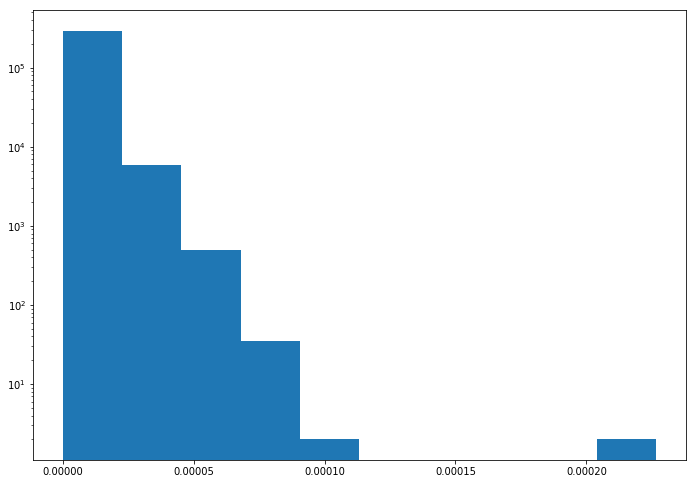

In [11]:
plt.hist(prop/prop.sum())
plt.yscale("log")

In [12]:
prop[prop > .5].shape

(2,)

In [13]:
for _ in range(2000):
    t = sorted(np.random.choice(len(prop), 3000, replace = False, p = prop/prop.sum()), reverse = True)[:10]
    if 299998 not in t:
        print(t[:10])

[299997, 299956, 299906, 299864, 299832, 299801, 299647, 299533, 299524, 299503]
[299970, 299966, 299792, 299749, 299533, 299480, 299385, 299278, 299249, 299241]
[299997, 299970, 299955, 299864, 299857, 299717, 299662, 299594, 299588, 299503]
[299997, 299974, 299933, 299923, 299838, 299792, 299603, 299600, 299498, 299418]
[299957, 299813, 299524, 299486, 299396, 299372, 299226, 299207, 299140, 299106]
[299997, 299840, 299607, 299546, 299506, 299502, 299446, 299372, 299279, 299222]
[299835, 299754, 299567, 299502, 299359, 299279, 298966, 298943, 298872, 298609]
[299997, 299533, 299502, 299367, 299248, 298904, 298899, 298825, 298804, 298694]
[299972, 299912, 299646, 299632, 299607, 299531, 299522, 299480, 299479, 299444]
[299954, 299679, 299588, 299535, 299402, 299291, 299249, 299133, 298749, 298733]
[299997, 299978, 299721, 299535, 299531, 299462, 299367, 299337, 299195, 299144]
[299997, 299973, 299934, 299832, 299831, 299803, 299689, 299679, 299585, 299560]
[299997, 299906, 299868, 299

[299821, 299784, 299483, 299232, 299045, 298992, 298949, 298881, 298593, 298165]
[299997, 299954, 299864, 299787, 299607, 299594, 299481, 299291, 299193, 299021]
[299985, 299857, 299849, 299795, 299792, 299678, 299546, 299481, 299436, 299356]
[299978, 299882, 299827, 299801, 299796, 299782, 299717, 299679, 299670, 299629]
[299997, 299981, 299973, 299944, 299801, 299749, 299675, 299615, 299535, 299502]
[299970, 299963, 299829, 299502, 299337, 299264, 299248, 299217, 299176, 299140]
[299969, 299942, 299803, 299784, 299675, 299274, 299195, 299127, 298971, 298960]
[299997, 299974, 299841, 299792, 299679, 299511, 299429, 299318, 299274, 299222]
[299997, 299969, 299944, 299271, 299238, 299215, 299159, 299079, 298915, 298900]
[299997, 299974, 299864, 299708, 299624, 299539, 299279, 299226, 299061, 299029]
[299970, 299963, 299914, 299749, 299698, 299372, 299272, 299215, 298723, 298191]
[299997, 299969, 299906, 299680, 299632, 299605, 299556, 299549, 299503, 299414]
[299910, 299878, 299767, 299

[299997, 299857, 299836, 299546, 299279, 299277, 299072, 298900, 298723, 298699]
[299909, 299875, 299849, 299787, 299698, 299546, 299344, 299231, 299217, 299081]
[299997, 299956, 299748, 299607, 299503, 299437, 299432, 299271, 299270, 299215]
[299997, 299957, 299760, 299540, 299502, 299436, 299159, 299144, 299042, 299019]
[299970, 299932, 299909, 299767, 299748, 299717, 299679, 299560, 299533, 299520]
[299984, 299977, 299945, 299668, 299502, 299429, 299225, 298881, 298434, 298364]
[299997, 299956, 299801, 299679, 299646, 299540, 299481, 299291, 299126, 299104]
[299977, 299944, 299892, 299556, 299541, 299447, 299434, 299393, 299392, 299126]
[299997, 299956, 299944, 299910, 299806, 299722, 299689, 299603, 299502, 299489]
[299955, 299912, 299826, 299556, 299548, 299546, 299367, 299210, 299196, 299151]
[299988, 299905, 299818, 299801, 299784, 299779, 299454, 299423, 299248, 299154]
[299997, 299934, 299727, 299679, 299653, 299607, 299589, 299396, 299248, 298992]
[299972, 299942, 299898, 299

KeyboardInterrupt: 

0.9

In [14]:
prop[prop > .3]

array([0.35389197, 0.34076351, 0.32093152, 0.32061765, 0.30574073,
       0.33057056, 0.33149969, 0.3054409 , 0.31968245, 0.30574421,
       0.33099289, 0.34932831, 0.3429795 , 0.32398877, 0.44120688,
       0.31069547, 0.34097399, 0.30149068, 0.36257618, 0.9       ,
       0.9       ])

In [15]:
prop.sum()

3970.6061643497233

In [16]:
.9/prop.sum()

0.00022666564316569418

In [17]:
.3/prop.sum()

7.555521438856473e-05

In [18]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [19]:
t  = softmax(prop)

In [20]:
t

array([0.00000329, 0.00000329, 0.00000338, ..., 0.00000329, 0.00000809,
       0.00000809])

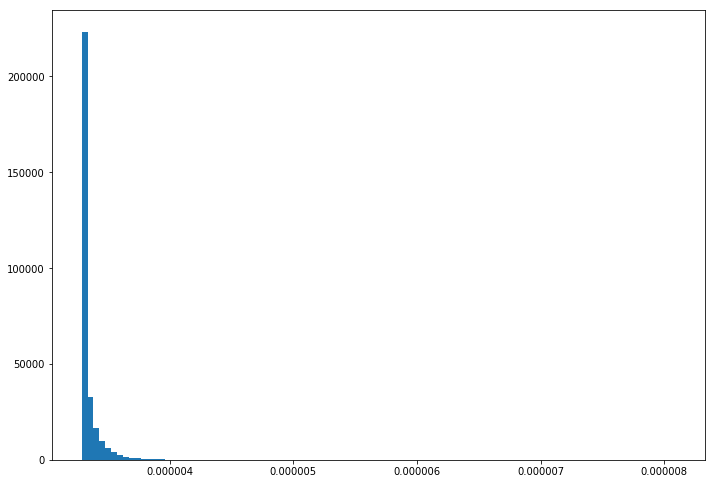

In [23]:
plt.hist(t, bins = 100);

In [45]:
N2

array([0.99958847, 0.99999882, 0.99999995, 0.99874569, 0.9999978 ,
       0.99999981, 1.        , 0.99999996, 0.99983665, 1.        ,
       1.        , 0.99999384, 0.99999961, 1.        , 0.99999997,
       0.99981757, 0.99999995, 0.99906853, 0.99999982, 1.        ,
       0.99964513, 0.99951237, 1.        , 0.99942436, 0.99987847,
       1.        , 0.99984193, 1.        , 0.99999882, 0.99999999,
       0.99998501, 0.99979782, 1.        , 1.        , 1.        ,
       0.99802948, 0.99977569, 0.99831543, 0.99948438, 0.99986852,
       0.9999869 , 1.        , 1.        , 0.99676028, 0.99994609,
       0.99999998, 0.99993806, 0.99994464, 1.        , 0.99996832,
       1.        , 0.99181801, 0.99997984, 1.        , 0.99999647,
       1.        , 0.99641001, 0.9999121 , 0.99999971, 0.99949227])

In [53]:
test = np.array([.2, .2, .2, .2,.2, .2,.2, .2,.45, .9])

In [54]:
test/test.sum()

array([0.06779661, 0.06779661, 0.06779661, 0.06779661, 0.06779661,
       0.06779661, 0.06779661, 0.06779661, 0.15254237, 0.30508475])

In [71]:
np.random.choice(len(test), 2, replace = False, p = test/test.sum())

array([3, 8])

In [81]:
N2

array([0.99999767, 0.88325186, 0.99712206, 0.80291996, 0.9914917 ,
       0.95160894, 0.78935005, 0.7964273 , 0.99231483, 0.54338055,
       0.80062191, 0.93767593, 0.97639825, 0.94395622, 0.93038491,
       0.39842764, 0.92006614, 0.83670536, 0.98718163, 0.69280534,
       0.94547777, 0.71769709, 0.92850038, 0.95361137, 0.84727167,
       0.80526213, 0.95524176, 0.99210141, 0.90247816, 0.97660606,
       0.99279799, 0.90384836, 0.99564903, 0.99378774, 0.90546038,
       0.91908267, 0.76292106, 0.95429015, 0.98509793, 0.96090199,
       0.92564807, 0.80558864, 0.6140329 , 0.90626987, 0.91421143,
       0.7740918 , 0.9711672 , 0.34218193, 0.97012355, 0.94711755,
       0.96164659, 0.74557025, 0.71453591, 0.99694279, 0.99752778,
       0.99761948, 0.99018627, 0.76267325, 0.74780692, 0.99940562,
       0.49388965, 0.97330897, 0.98300382, 0.8526712 , 0.96333379,
       0.98057325, 0.84651394, 0.98949688, 0.99536175, 0.89923421,
       0.9861146 , 0.97486579, 0.99282598, 0.9729351 , 0.97846